# Hands-On Pertemuan 1: Pengenalan Big Data dan Overview Teknologi

## Tujuan
Pada akhir praktikum ini, mahasiswa diharapkan mampu:
1. Memahami konsep dasar Big Data.
2. Menjelaskan karakteristik dan tantangan Big Data (Volume, Variety, Velocity, dan Veracity).
3. Mengenal teknologi yang digunakan dalam ekosistem Big Data.
4. Menginstal dan mengonfigurasi Anaconda untuk bekerja dengan alat Big Data seperti Hadoop dan Spark.
5. Memulai praktik sederhana terkait pengolahan data menggunakan PySpark dan Pandas.

## Peralatan yang Dibutuhkan
1. Anaconda (untuk manajemen lingkungan)
2. Jupyter Notebook (bawaan dari Anaconda)
3. PySpark (untuk pemrosesan data skala besar)
4. Pandas (untuk data analysis)
5. Python (bawaan dari Anaconda)

## Langkah-Langkah Hands-On

### 1. Instalasi Anaconda
- **Langkah 1: Unduh dan Instal Anaconda**
  Anaconda adalah platform distribusi Python yang menyertakan berbagai alat pengembangan, termasuk Jupyter Notebook. Ikuti langkah-langkah instalasi sesuai sistem operasi:
  - Unduh Anaconda: [Download Anaconda](https://www.anaconda.com/products/individual)
  - Instal sesuai instruksi yang ada di situs web tersebut (Windows/Mac/Linux).

- **Langkah 2: Menginstal PySpark di Anaconda**
  Setelah Anaconda terinstal, tambahkan PySpark:
  ```bash
  conda install -c conda-forge pyspark
  ```

- **Langkah 3: Menginstal Pandas**
  Untuk memudahkan data analysis, install Pandas:
  ```bash
  conda install pandas
  ```

### 2. Pengenalan dan Praktik Dasar PySpark dan Pandas
- **Langkah 1: Membuka Jupyter Notebook**
  Setelah instalasi selesai, buka Jupyter Notebook melalui Anaconda Navigator atau melalui terminal dengan perintah:
  ```bash
  jupyter notebook
  ```

- **Langkah 2: Membuat Project Notebook Baru**
  Di Jupyter Notebook, buat notebook baru untuk praktikum ini.

- **Langkah 3: Praktik dengan PySpark**
  Buat program sederhana untuk memulai dengan PySpark. Gunakan PySpark untuk membuat DataFrame dan memanipulasi data sederhana:

In [4]:
import findspark
findspark.init()

In [12]:


from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "kuli", "adu musang", "laki"), ("Budi", 23, "buruh", "diadu ali", "kadang laki"),
        ("Citra", 29, "aktor", "mandi", "perempuan"), ("Dina", 45, "guru", "makan nasi", "diduga perempuan")]
columns = ["Nama", "Usia", "pekerjaan", "hobi", "gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()


+-----+----+---------+----------+----------------+
| Nama|Usia|pekerjaan|      hobi|          gender|
+-----+----+---------+----------+----------------+
|  Ali|  34|     kuli|adu musang|            laki|
| Budi|  23|    buruh| diadu ali|     kadang laki|
|Citra|  29|    aktor|     mandi|       perempuan|
| Dina|  45|     guru|makan nasi|diduga perempuan|
+-----+----+---------+----------+----------------+



- **Tugas 1**: Jalankan kode di atas dan buat modifikasi dengan menambahkan data lain berupa kolom pekerjaan, hobi dan gender.

### 3. Praktik PySpark Lanjutan
- **Latihan 1**: Memanipulasi Data dengan PySpark.

In [6]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()


+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+----+----+
|Nama|Usia|
+----+----+
| Ali|  34|
|Dina|  45|
+----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+



- **Tugas 2**: Lakukan filter, penghitungan rata-rata, dan pengurutan data menggunakan PySpark.

### 4. Praktik dengan Pandas
- **Latihan 2**:  Buat DataFrame menggunakan Pandas:

In [18]:
import pandas as pd
from tabulate import tabulate

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Menambahkan kolom baru 'Kota'
df_pandas["Kota"] = ["Jakarta", "Bandung", "Surabaya", "Medan"]

# Menampilkan DataFrame yang telah dimodifikasi dengan tabulate
print(tabulate(df_pandas, headers='keys', tablefmt='pretty'))

# Filter DataFrame berdasarkan usia > 30 tahun
df_filtered = df_pandas[df_pandas["Usia"] > 30]

# Menampilkan DataFrame hasil filter dengan tabulate
print(tabulate(df_filtered, headers='keys', tablefmt='pretty'))





+---+-------+------+----------+
|   | Nama  | Usia |   Kota   |
+---+-------+------+----------+
| 0 |  Ali  |  34  | Jakarta  |
| 1 | Budi  |  23  | Bandung  |
| 2 | Citra |  29  | Surabaya |
| 3 | Dina  |  45  |  Medan   |
+---+-------+------+----------+
+---+------+------+---------+
|   | Nama | Usia |  Kota   |
+---+------+------+---------+
| 0 | Ali  |  34  | Jakarta |
| 3 | Dina |  45  |  Medan  |
+---+------+------+---------+


- **Tugas 3**: Modifikasi DataFrame Pandas dengan menambahkan kolom baru dan melakukan operasi seperti filtering data berdasarkan usia.

### 5. Praktik Pandas Lanjutan
- **Latihan 3**: Penggunaan Pandas untuk operasi lebih kompleks.

DataFrame Hasil Join:
    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat

Statistik Deskriptif untuk Usia:
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


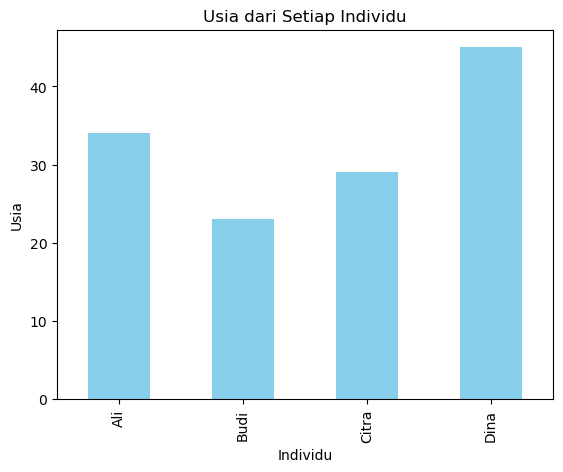

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat DataFrame Pandas pertama
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame Pandas kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame berdasarkan kolom "Nama"
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")

# Menampilkan hasil join
print("DataFrame Hasil Join:")
print(df_joined)

# Menghitung statistik deskriptif
print("\nStatistik Deskriptif untuk Usia:")
print(df_pandas.describe())

# Plotting Data
df_pandas['Usia'].plot(kind='bar', color='skyblue')
plt.title('Usia dari Setiap Individu')
plt.xlabel('Individu')
plt.ylabel('Usia')
plt.xticks(ticks=range(len(df_pandas['Nama'])), labels=df_pandas['Nama'])
plt.show()



- **Tugas 4**: Lakukan penggabungan DataFrame dan visualisasikan data dengan Pandas.

### 5. Menggabungkan PySpark dan Pandas
- **Latihan 4: Mengonversi DataFrame antara PySpark dan Pandas**
  Praktik untuk convert DataFrame dari PySpark ke Pandas dan sebaliknya:


In [20]:
from pyspark.sql import SparkSession, Row
import pandas as pd

# Memulai Spark session
spark = SparkSession.builder.appName("Pandas_Spark_Conversion").getOrCreate()

# Membuat DataFrame PySpark
data_spark = [Row(Nama="Eva", Usia=40), Row(Nama="Fahri", Usia=28), Row(Nama="Gita", Usia=36)]
df_spark = spark.createDataFrame(data_spark)

# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menggabungkan DataFrame Pandas dan DataFrame dari PySpark
df_combined_pandas = pd.concat([df_pandas, df_pandas_from_spark])

# Menampilkan DataFrame gabungan
print("DataFrame Gabungan:")
print(df_combined_pandas)

# Menghitung rata-rata usia dari DataFrame gabungan
mean_age = df_combined_pandas["Usia"].mean()
print("\nRata-rata Usia:", mean_age)


DataFrame Gabungan:
    Nama  Usia
0    Ali    34
1   Budi    23
2  Citra    29
3   Dina    45
0    Eva    40
1  Fahri    28
2   Gita    36

Rata-rata Usia: 33.57142857142857


- **Tugas 5**: Gunakan metode ini untuk menggabungkan data yang Anda buat di PySpark dengan data dari Pandas, kemudian lakukan analisis sederhana seperti menghitung rata-rata usia.

### 6. Konversi Data antara PySpark dan Pandas

In [21]:
from pyspark.sql import SparkSession, Row
import pandas as pd

# Memulai Spark session
spark = SparkSession.builder.appName("Pandas_Spark_Conversion").getOrCreate()

# Membuat DataFrame PySpark
data_spark = [Row(Nama="Eva", Usia=40), Row(Nama="Fahri", Usia=28), Row(Nama="Gita", Usia=36)]
df_spark = spark.createDataFrame(data_spark)

# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menggabungkan DataFrame Pandas dan DataFrame dari PySpark
df_combined_pandas = pd.concat([df_pandas, df_pandas_from_spark])

# Menampilkan DataFrame gabungan
print("DataFrame Gabungan:")
print(df_combined_pandas)

# Menghitung nilai maksimum usia dari DataFrame gabungan
max_age = df_combined_pandas["Usia"].max()
print("\nNilai Maksimum Usia:", max_age)



DataFrame Gabungan:
    Nama  Usia
0    Ali    34
1   Budi    23
2  Citra    29
3   Dina    45
0    Eva    40
1  Fahri    28
2   Gita    36

Nilai Maksimum Usia: 45


- **Tugas 6**: Gabungkan data dari PySpark dan Pandas, lalu lakukan operasi statistik seperti menghitung nilai maksimum usia.